# Data import and pre-processing - Additional Data import for Modelling variables

In [1]:
import pandas as pd
import glob # to scan files from a folder and get it in a list of names with locations
from functools import reduce #to be able to merge the items within a list

###  For the Forecasts to run smoothly, updated internal and external data needs to be fed. External data can be downloaded completely as and when available for start to end period.

### However internal data will be appended as and when receied on email.
### Three internal variables are quarterly and will be incorporated in the forecast file directly due to period mismatch of modelling


# Import  MAster CSV which has the model data

In [3]:
master_data = pd.read_csv('Welder_Forecast_Master.csv')
master_data.tail()

,DATE,Labor Demand,Orders_millions_Q,Severance_Amount_millions_Q,Profit_margin_perc_Q,wage_max,Labor_conv_count_M,awh_prd_emp_mfg_dur_gds_cal_M_Fred,Civ_lab_force_SA_county_m_Fred,All_emp_mfg_dur_gds_SA_MSA_M_Fred
64,2/1/2020,94,2384,4.0,9.3,22.54,15,25.709882,714834,24.3
65,3/1/2020,96,2384,4.0,9.3,24.19,6,25.547427,711060,24.0
66,4/1/2020,82,3040,5.0,7.1,22.17,1,25.661888,689861,21.6
67,5/1/2020,94,3040,5.0,7.1,23.49,0,25.855238,695119,21.6
68,6/1/2020,96,3040,5.0,7.1,23.49,0,25.595351,709583,21.5


In [4]:
master_data['DATE'] =   pd.to_datetime(master_data.DATE)
master_data = master_data.set_index('DATE')
master_data['Severance_Amount_millions_Q'] = master_data['Severance_Amount_millions_Q'].abs()
master_data

,Labor Demand,Orders_millions_Q,Severance_Amount_millions_Q,Profit_margin_perc_Q,wage_max,Labor_conv_count_M,awh_prd_emp_mfg_dur_gds_cal_M_Fred,Civ_lab_force_SA_county_m_Fred,All_emp_mfg_dur_gds_SA_MSA_M_Fred
DATE,,,,,,,,,
2014-10-01,23,1271,1.0,8.4,22.00,0,23.253308,682478,24.8
2014-11-01,21,1271,1.0,8.4,22.00,1,23.471355,682605,24.8
2014-12-01,19,1271,1.0,8.4,22.00,4,23.351318,676595,24.8
2015-01-01,13,3782,3.0,8.6,22.00,0,23.422424,683316,24.4
2015-02-01,11,3782,3.0,8.6,22.00,0,23.484704,681984,24.4
...,...,...,...,...,...,...,...,...,...
2020-02-01,94,2384,4.0,9.3,22.54,15,25.709882,714834,24.3
2020-03-01,96,2384,4.0,9.3,24.19,6,25.547427,711060,24.0
2020-04-01,82,3040,5.0,7.1,22.17,1,25.661888,689861,21.6


In [5]:
# Fill  missing values with a backfill
master_data = master_data.fillna(method='bfill')
master_data.tail()

,Labor Demand,Orders_millions_Q,Severance_Amount_millions_Q,Profit_margin_perc_Q,wage_max,Labor_conv_count_M,awh_prd_emp_mfg_dur_gds_cal_M_Fred,Civ_lab_force_SA_county_m_Fred,All_emp_mfg_dur_gds_SA_MSA_M_Fred
DATE,,,,,,,,,
2020-02-01,94,2384,4.0,9.3,22.54,15,25.709882,714834,24.3
2020-03-01,96,2384,4.0,9.3,24.19,6,25.547427,711060,24.0
2020-04-01,82,3040,5.0,7.1,22.17,1,25.661888,689861,21.6
2020-05-01,94,3040,5.0,7.1,23.49,0,25.855238,695119,21.6
2020-06-01,96,3040,5.0,7.1,23.49,0,25.595351,709583,21.5


# 0. Internal_data_collation_from_emails

In [8]:
# manual data file - First update the values in manual file using emails from SCM team (darlene) and copy mobility earnings values from Quarterly PDF
interal_new_data = pd.read_csv('Manual_File_to_be_Updated.csv')
interal_new_data

,DATE,Labor Demand,Orders_millions_Q,Severance_Amount_millions_Q,Profit_margin_perc_Q,wage_max,Labor_conv_count_M
0,7/1/2020,91,2080.0,5.0,9.9,23.49,4
1,8/1/2020,95,2080.0,5.0,9.9,23.49,8
2,9/1/2020,84,2080.0,5.0,9.9,23.49,3
3,10/1/2020,78,NaN,NaN,NaN,23.76,0


In [9]:
interal_new_data['DATE'] =   pd.to_datetime(interal_new_data.DATE)
interal_new_data = interal_new_data.set_index('DATE')
interal_new_data['Severance_Amount_millions_Q'] = interal_new_data['Severance_Amount_millions_Q'].abs()
interal_new_data

,Labor Demand,Orders_millions_Q,Severance_Amount_millions_Q,Profit_margin_perc_Q,wage_max,Labor_conv_count_M
DATE,,,,,,
2020-07-01,91,2080.0,5.0,9.9,23.49,4
2020-08-01,95,2080.0,5.0,9.9,23.49,8
2020-09-01,84,2080.0,5.0,9.9,23.49,3
2020-10-01,78,NaN,NaN,NaN,23.76,0


# 1. External Data Collation

#### Factor 1 - Average Hourly Earnings of Production Employees Manufacturing Durable Goods in California

Source: Fred

Steps: Download the data including latest available period and convert date to datetime and move it to index

In [11]:

F7 = pd.read_csv('SMU06000003100000008SA.csv')
# Source: https://fred.stlouisfed.org/series/SMU06000003100000008SA
F7['DATE'] =   pd.to_datetime(F7.DATE)
F7 = F7.set_index('DATE')
F7 = F7['2020-07-01':]
F7['awh_prd_emp_mfg_dur_gds_cal_M_Fred'] = F7['SMU06000003100000008SA']
F7 = F7.drop( columns = ['SMU06000003100000008SA'])


#F['newvar'] = F['oldvar']
#F = F.drop( columns = ['oldvar'])

F7.dtypes
F7.tail()
#F7.isna().sum() # checking for missing values

,awh_prd_emp_mfg_dur_gds_cal_M_Fred
DATE,
2020-07-01,25.378577
2020-08-01,25.396480
2020-09-01,25.263756


#### Factor 10 - Civilian Labor Force in Sacramento County, CA

In [12]:
F10 = pd.read_csv('CASACR5LFN.csv')
# source: https://fred.stlouisfed.org/series/CASACR5LFN
F10['DATE'] =   pd.to_datetime(F10.DATE)
F10 = F10.set_index('DATE')
F10 = F10['2020-07-01':]

F10['Civ_lab_force_SA_county_m_Fred'] = F10['CASACR5LFN']
F10 = F10.drop( columns = ['CASACR5LFN'])
F10.tail()
#F10.isna().sum() # checking for missing values

,Civ_lab_force_SA_county_m_Fred
DATE,
2020-07-01,708988
2020-08-01,699501
2020-09-01,703712


#### Factor 12 - All Employees Manufacturing Durable Goods in Sacramento--Roseville--Arden-Arcade, CA (MSA)

Source: Fred

Steps: Download the data including latest available period and convert date to datetime and move it to index

In [13]:
# Factor 12 - All Employees Manufacturing Durable Goods in Sacramento--Roseville--Arden-Arcade, CA (MSA)
F12 = pd.read_csv('SMU06409003100000001.csv')
# source: https://fred.stlouisfed.org/series/SMU06409003100000001
F12['DATE'] =   pd.to_datetime(F12.DATE)
F12 = F12.set_index('DATE')
F12 = F12['2020-07-01':]

F12['All_emp_mfg_dur_gds_SA_MSA_M_Fred'] = F12['SMU06409003100000001']
F12 = F12.drop( columns = ['SMU06409003100000001'])

F12.dtypes
F12.tail()
#F12.isna().sum() # checking for missing values


,All_emp_mfg_dur_gds_SA_MSA_M_Fred
DATE,
2020-07-01,21.3
2020-08-01,21.6
2020-09-01,21.6


# Merging all the indivudual datasets to create a Master input dataset of new data

In [14]:
#Merging all datasets - compile the list of dataframes you want to merge
data_frames = [interal_new_data, F7, F10, F12]
input_df0 = reduce(lambda  left,right: pd.merge(left,right,  left_index = True, right_index = True,
                                            how='outer'), data_frames)
# input_df0 = input_df0['2015-01-01':]
input_df0.shape
input_df0.head(1)

input_df0.isna().sum().sum()# checking for missing values - the remaining missing values are because data is not availble for that period
input_df0.tail(5)

,Labor Demand,Orders_millions_Q,Severance_Amount_millions_Q,Profit_margin_perc_Q,wage_max,Labor_conv_count_M,awh_prd_emp_mfg_dur_gds_cal_M_Fred,Civ_lab_force_SA_county_m_Fred,All_emp_mfg_dur_gds_SA_MSA_M_Fred
DATE,,,,,,,,,
2020-07-01,91,2080.0,5.0,9.9,23.49,4,25.378577,708988.0,21.3
2020-08-01,95,2080.0,5.0,9.9,23.49,8,25.396480,699501.0,21.6
2020-09-01,84,2080.0,5.0,9.9,23.49,3,25.263756,703712.0,21.6
2020-10-01,78,NaN,NaN,NaN,23.76,0,NaN,NaN,NaN


In [15]:
input_df = master_data.append(input_df0)
input_df = input_df['2015-01-01':]
input_df.shape
input_df.tail()

,Labor Demand,Orders_millions_Q,Severance_Amount_millions_Q,Profit_margin_perc_Q,wage_max,Labor_conv_count_M,awh_prd_emp_mfg_dur_gds_cal_M_Fred,Civ_lab_force_SA_county_m_Fred,All_emp_mfg_dur_gds_SA_MSA_M_Fred
DATE,,,,,,,,,
2020-06-01,96,3040.0,5.0,7.1,23.49,0,25.595351,709583.0,21.5
2020-07-01,91,2080.0,5.0,9.9,23.49,4,25.378577,708988.0,21.3
2020-08-01,95,2080.0,5.0,9.9,23.49,8,25.396480,699501.0,21.6
2020-09-01,84,2080.0,5.0,9.9,23.49,3,25.263756,703712.0,21.6
2020-10-01,78,NaN,NaN,NaN,23.76,0,NaN,NaN,NaN


In [17]:
input_df.to_pickle('input_monthly.pkl')  # save a python data frame 
#Then you can load it back using:
#input_df2 = pd.read_pickle(input_df2)

In [18]:
input_df.to_csv('input_monthly.csv') # Use Tab to seperate data

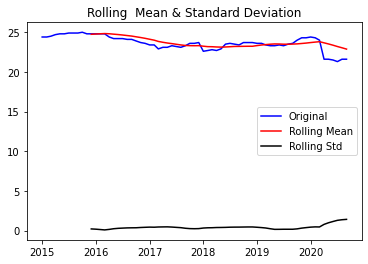

Results of Dickey-Fuller Test:
Test Statistic                 -1.001168
p-value                         0.752838
#Lags Used                      0.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


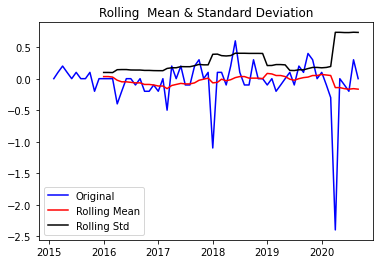

Results of Dickey-Fuller Test:
Test Statistic                -7.395934e+00
p-value                        7.778425e-11
#Lags Used                     0.000000e+00
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64
Data is stationary - and we need no transformation to make it stationary


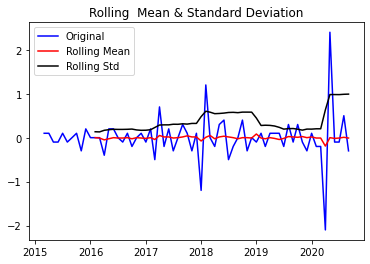

Results of Dickey-Fuller Test:
Test Statistic                -9.138645e+00
p-value                        2.889360e-15
#Lags Used                     1.000000e+00
Number of Observations Used    6.500000e+01
Critical Value (1%)           -3.535217e+00
Critical Value (5%)           -2.907154e+00
Critical Value (10%)          -2.591103e+00
dtype: float64
Data is stationary - and we need no transformation to make it stationary


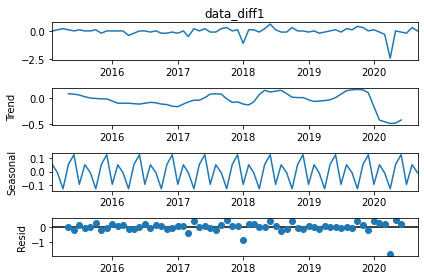

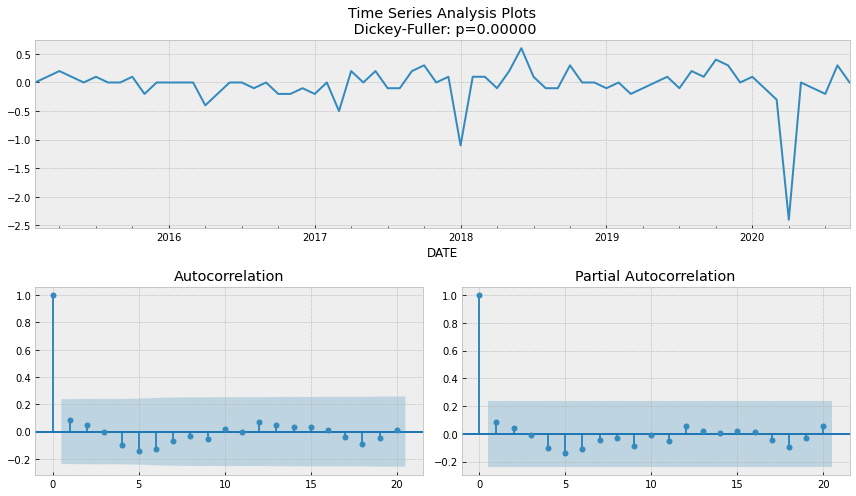

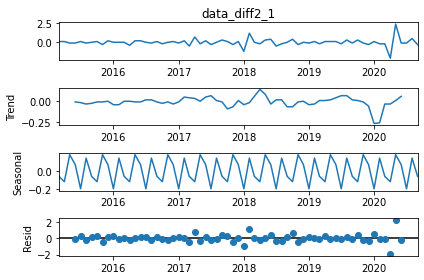

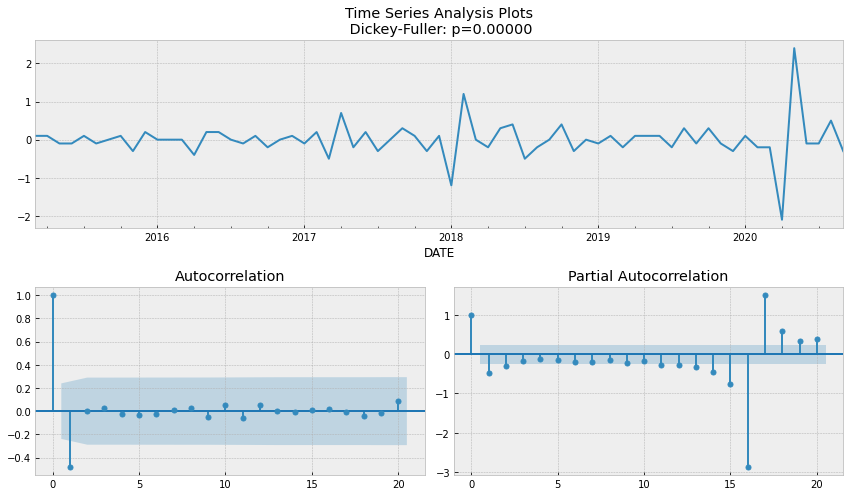

                                      SARIMAX Results                                       
Dep. Variable:                                 data   No. Observations:                   63
Model:             SARIMAX(0, 2, 3)x(2, 2, [1], 12)   Log Likelihood                 -21.390
Date:                              Wed, 09 Dec 2020   AIC                             56.781
Time:                                      12:24:55   BIC                             68.057
Sample:                                  01-01-2015   HQIC                            60.756
                                       - 03-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0512     17.219     -0.061      0.951     -34.800      32.698
ma.L2         -0.16

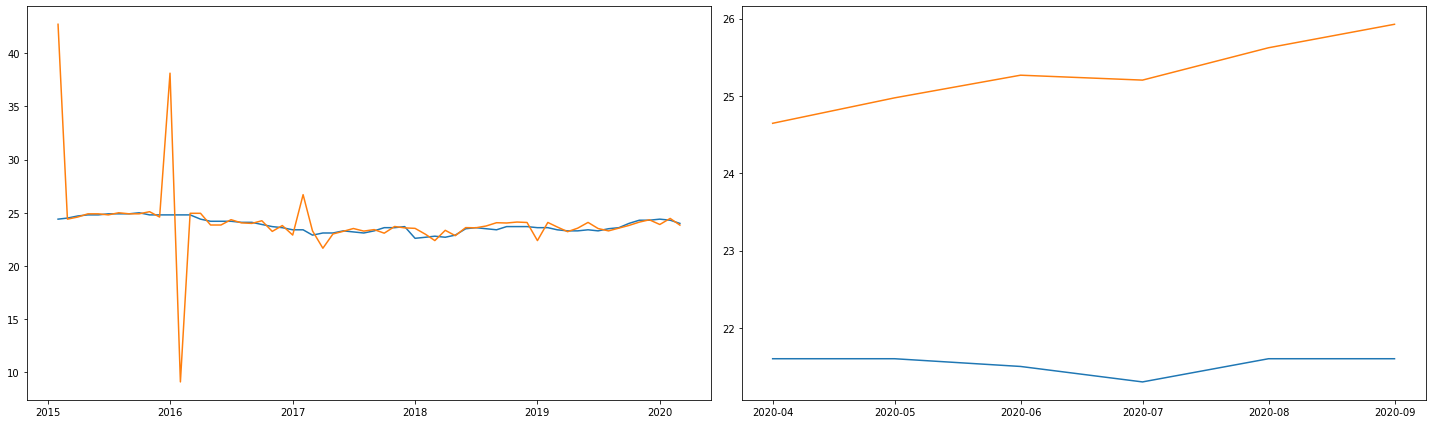

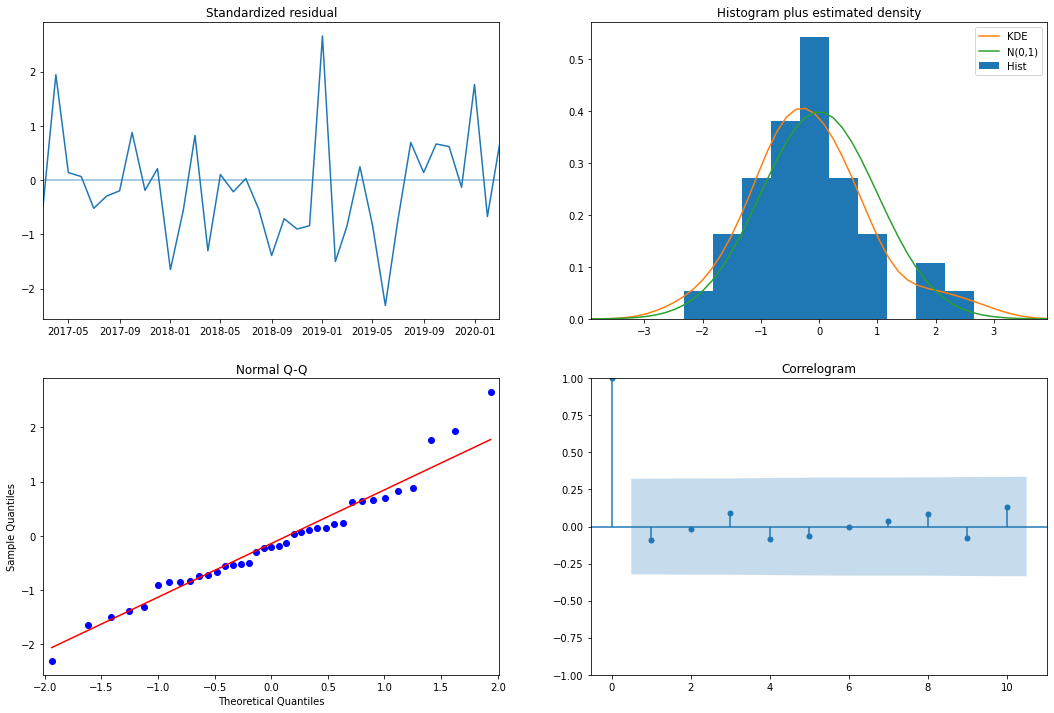

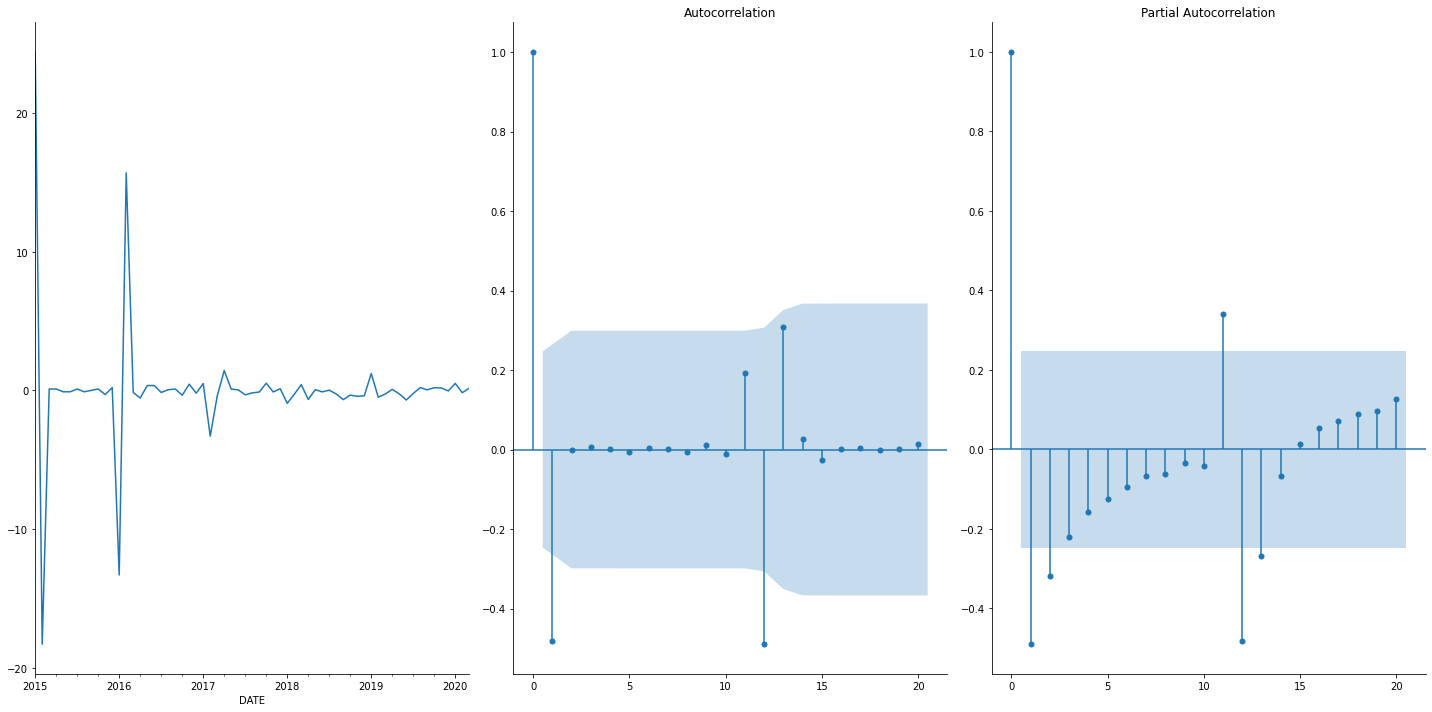

,All_emp_mfg_dur_gds_SA_MSA_M_Fred
2015-01-01,24.400000
2015-02-01,24.400000
2015-03-01,24.500000
2015-04-01,24.700000
2015-05-01,24.800000
...,...
2020-11-01,21.771505
2020-12-01,21.419246
2021-01-01,22.731341
2021-02-01,22.270412


In [19]:
%run 5.SCM_SARIMA_All_emp_mfg_dur_gds_SA_MSA_M_Fred.ipynb
All_emp_mfg_dur_gds_SA_MSA_M_Fred_1 = All_emp_mfg_dur_gds_SA_MSA_M_Fred_1[['data']]
All_emp_mfg_dur_gds_SA_MSA_M_Fred_1.rename(columns = {'data': 'All_emp_mfg_dur_gds_SA_MSA_M_Fred'}, inplace = True)
All_emp_mfg_dur_gds_SA_MSA_M_Fred_1

In [20]:
All_emp_mfg_dur_gds_SA_MSA_M_Fred_1

,All_emp_mfg_dur_gds_SA_MSA_M_Fred
2015-01-01,24.400000
2015-02-01,24.400000
2015-03-01,24.500000
2015-04-01,24.700000
2015-05-01,24.800000
...,...
2020-11-01,21.771505
2020-12-01,21.419246
2021-01-01,22.731341
2021-02-01,22.270412


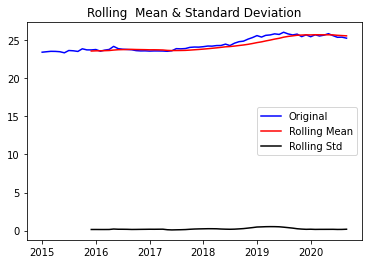

Results of Dickey-Fuller Test:
Test Statistic                 -0.725911
p-value                         0.839923
#Lags Used                      2.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


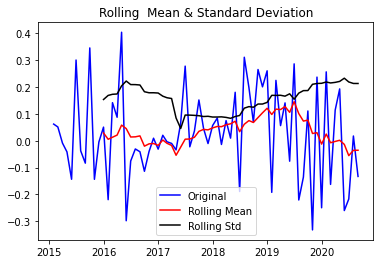

Results of Dickey-Fuller Test:
Test Statistic                -1.089604e+01
p-value                        1.191590e-19
#Lags Used                     0.000000e+00
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64
Data is stationary - and we need no transformation to make it stationary


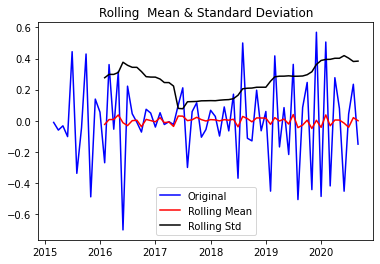

Results of Dickey-Fuller Test:
Test Statistic                 -5.551937
p-value                         0.000002
#Lags Used                      5.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64
Data is stationary - and we need no transformation to make it stationary


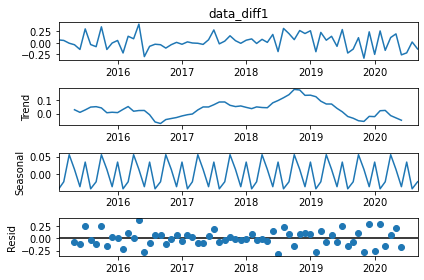

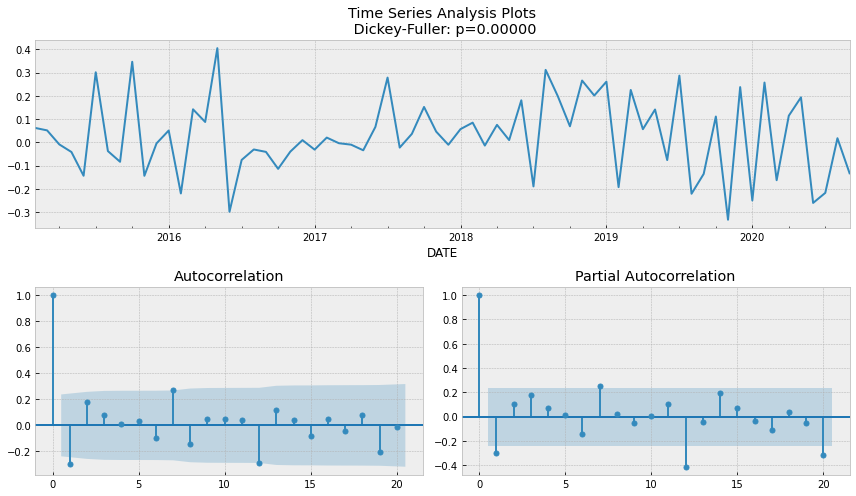

                                     SARIMAX Results                                      
Dep. Variable:                               data   No. Observations:                   63
Model:             SARIMAX(0, 1, 2)x(3, 1, 2, 12)   Log Likelihood                  15.757
Date:                            Wed, 09 Dec 2020   AIC                            -15.513
Time:                                    12:32:37   BIC                             -0.217
Sample:                                01-01-2015   HQIC                            -9.688
                                     - 03-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2953      0.163     -1.808      0.071      -0.615       0.025
ma.L2          0.4253      0.136   

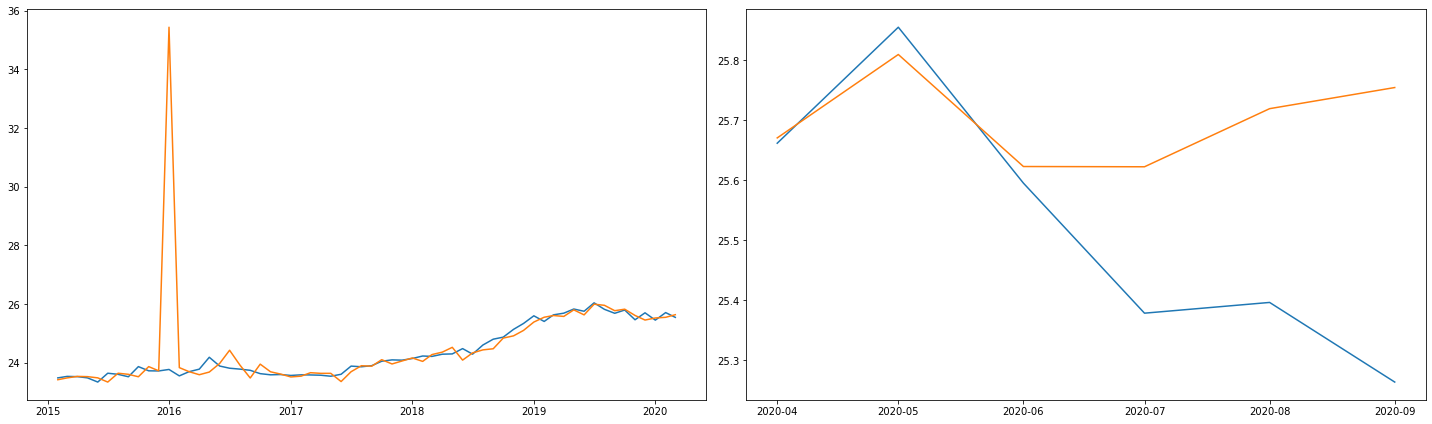

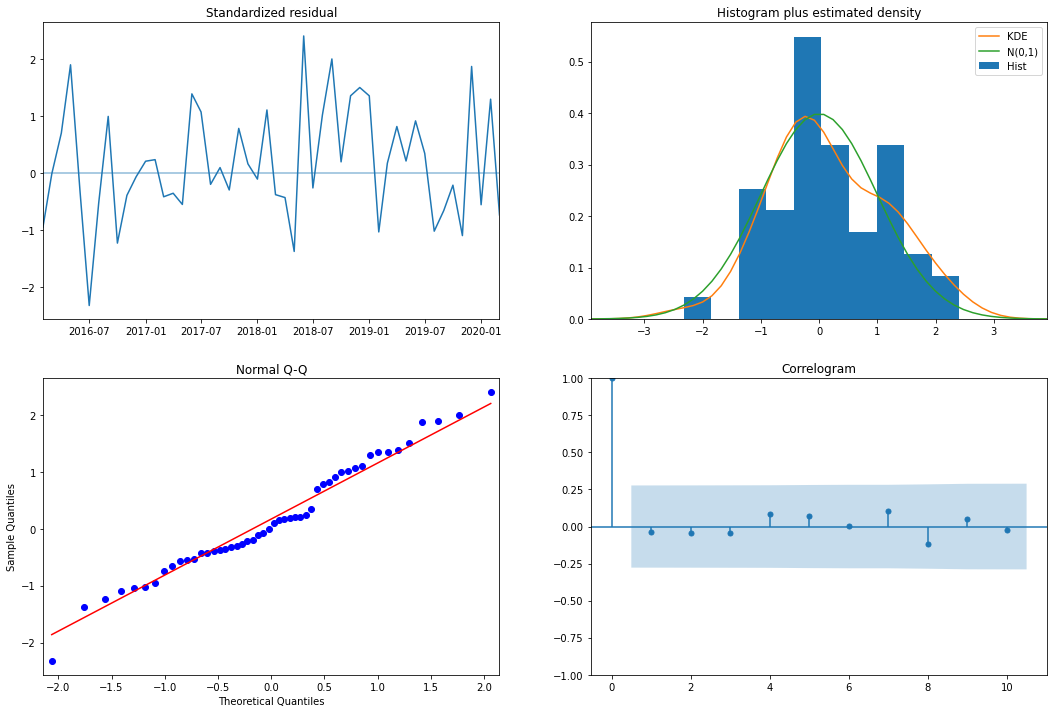

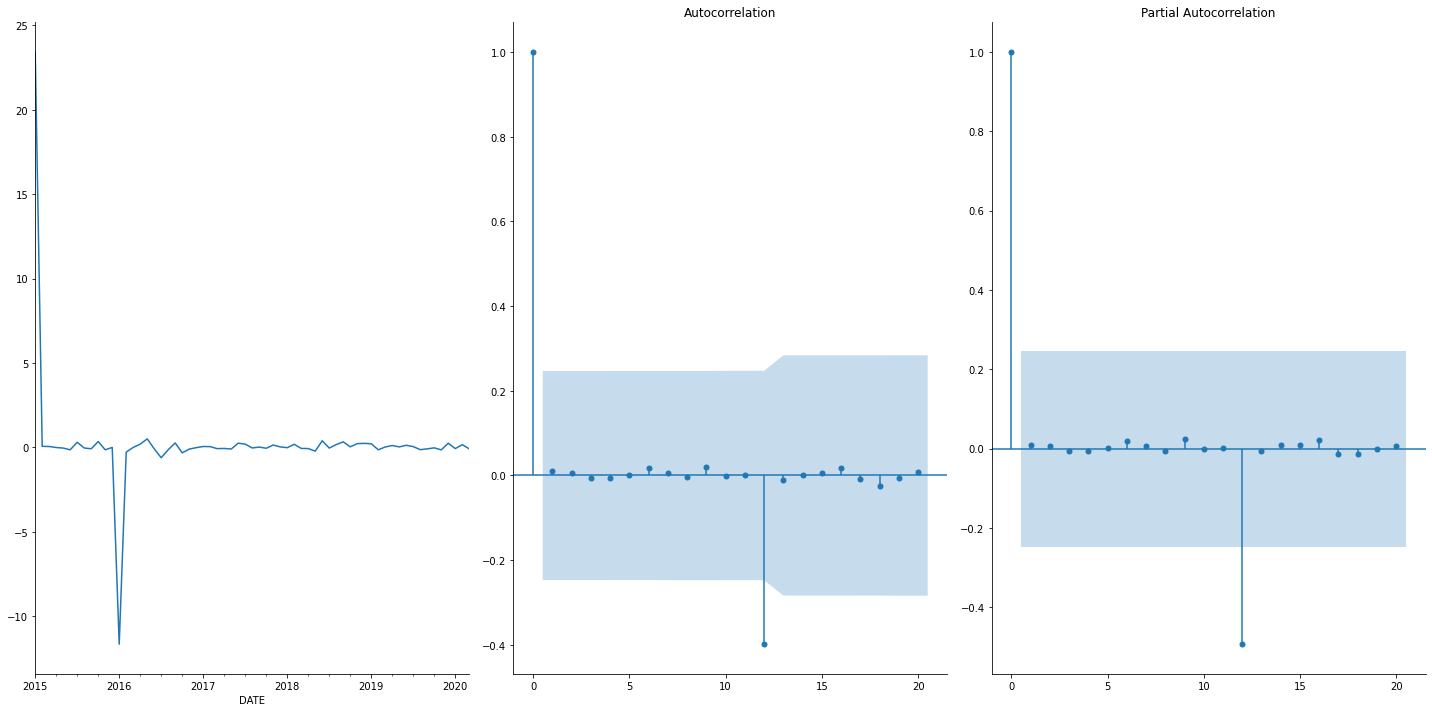

,awh_prd_emp_mfg_dur_gds_cal_M_Fred
2015-01-01,23.422424
2015-02-01,23.484704
2015-03-01,23.536235
2015-04-01,23.527658
2015-05-01,23.486379
...,...
2020-11-01,25.340455
2020-12-01,25.219454
2021-01-01,25.387004
2021-02-01,25.185007


In [21]:
%run 5.SCM_SARIMA_awh_prd_emp_mfg_dur_gds_cal_M_Fred.ipynb
awh_prd_emp_mfg_dur_gds_cal_M_Fred_1 = awh_prd_emp_mfg_dur_gds_cal_M_Fred_1[['data']]
awh_prd_emp_mfg_dur_gds_cal_M_Fred_1.rename(columns = {'data': 'awh_prd_emp_mfg_dur_gds_cal_M_Fred'}, inplace = True)
awh_prd_emp_mfg_dur_gds_cal_M_Fred_1

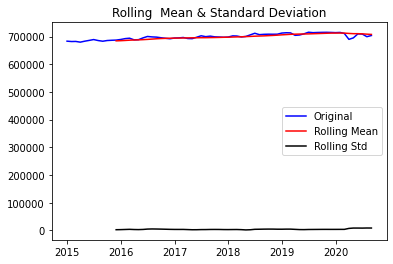

Results of Dickey-Fuller Test:
Test Statistic                 -1.979655
p-value                         0.295564
#Lags Used                     11.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


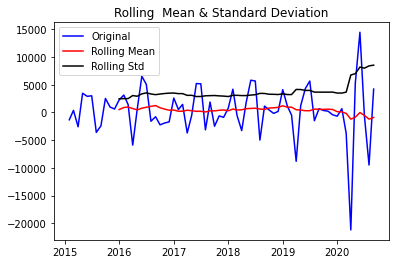

Results of Dickey-Fuller Test:
Test Statistic                 -0.984125
p-value                         0.759010
#Lags Used                     11.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


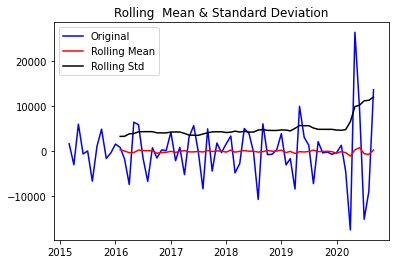

Results of Dickey-Fuller Test:
Test Statistic                -6.470560e+00
p-value                        1.370532e-08
#Lags Used                     1.000000e+01
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64
Data is stationary - and we need no transformation to make it stationary


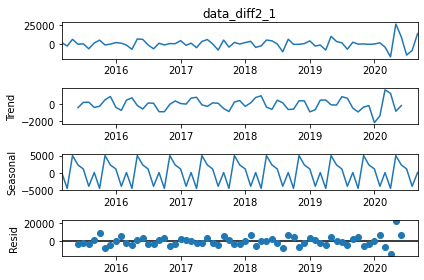

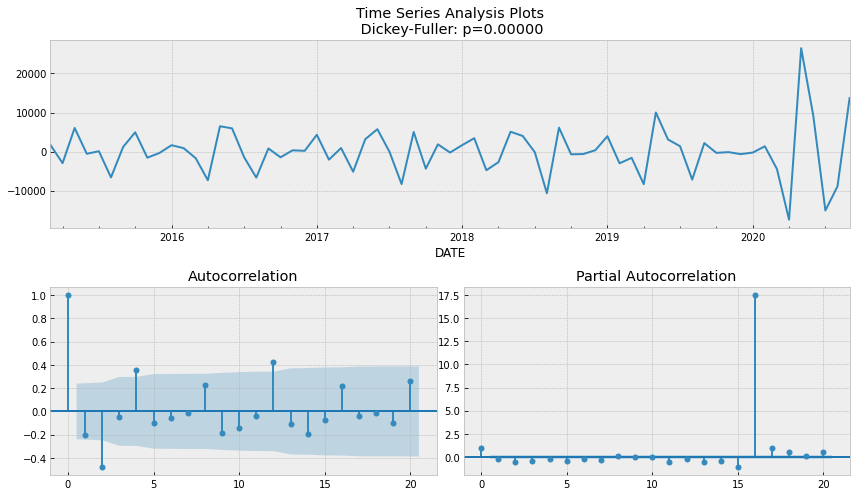

                                      SARIMAX Results                                       
Dep. Variable:                                 data   No. Observations:                   63
Model:             SARIMAX(0, 2, 3)x(2, 2, [1], 12)   Log Likelihood                -388.600
Date:                              Wed, 09 Dec 2020   AIC                            791.200
Time:                                      12:33:16   BIC                            802.476
Sample:                                  01-01-2015   HQIC                           795.175
                                       - 03-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1877   1062.267     -0.000      1.000   -2082.193    2081.818
ma.L2         -0.39

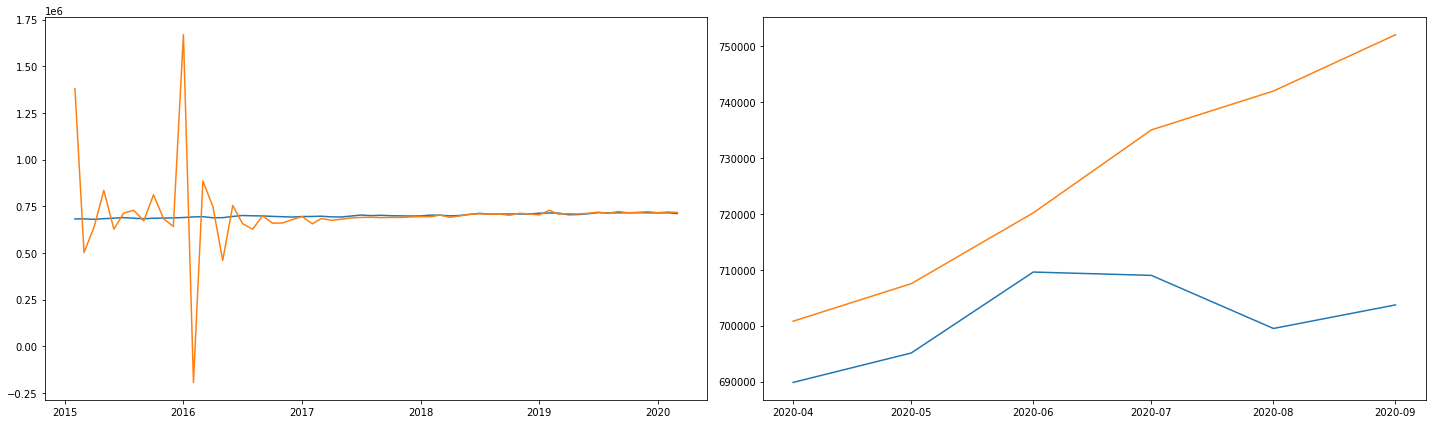

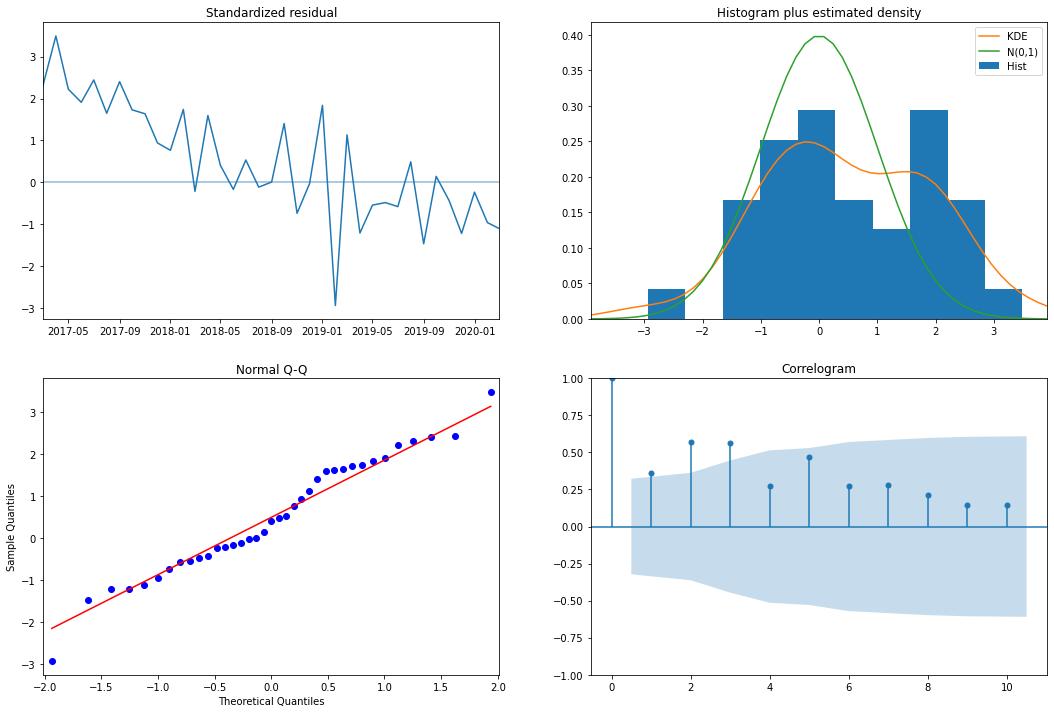

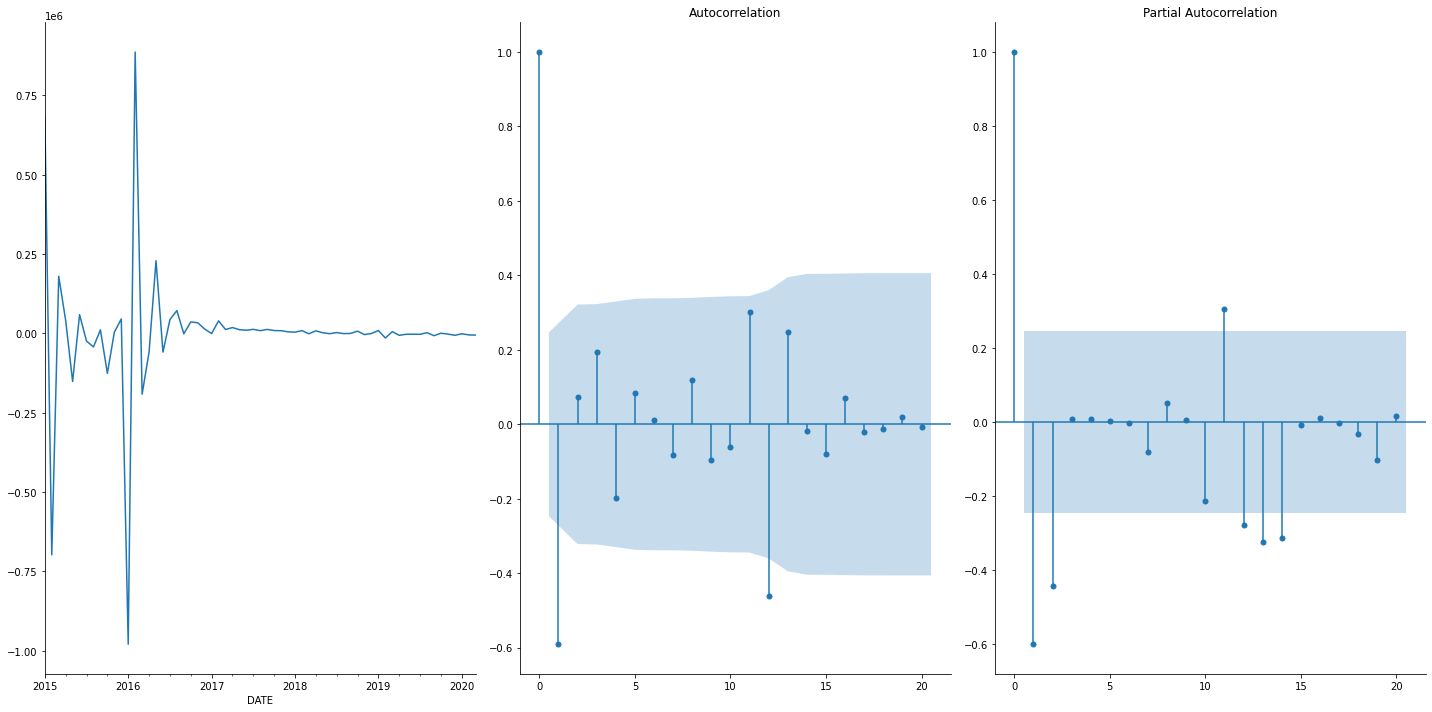

,Civ_lab_force_SA_county_m_Fred
2015-01-01,683316.000000
2015-02-01,681984.000000
2015-03-01,682352.000000
2015-04-01,679763.000000
2015-05-01,683222.000000
...,...
2020-09-01,703712.000000
2020-10-01,707525.879369
2020-11-01,711427.220006
2020-12-01,713784.346210


In [22]:
%run 5.SCM_SARIMA_Civ_lab_force_SA_county_m_Fred.ipynb
Civ_lab_force_SA_county_m_Fred_1 = Civ_lab_force_SA_county_m_Fred_1[['data']]
Civ_lab_force_SA_county_m_Fred_1.rename(columns = {'data': 'Civ_lab_force_SA_county_m_Fred'}, inplace = True)
Civ_lab_force_SA_county_m_Fred_1


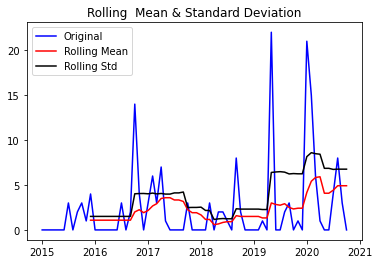

Results of Dickey-Fuller Test:
Test Statistic                -6.717238e+00
p-value                        3.556459e-09
#Lags Used                     0.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64
Data is stationary - and we need no transformation to make it stationary


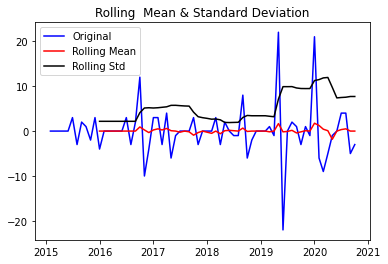

Results of Dickey-Fuller Test:
Test Statistic                -6.580386e+00
p-value                        7.540114e-09
#Lags Used                     6.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64
Data is stationary - and we need no transformation to make it stationary
                                     SARIMAX Results                                      
Dep. Variable:                               data   No. Observations:                   64
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 10)   Log Likelihood                -165.592
Date:                            Wed, 09 Dec 2020   AIC                            343.183
Time:                                    12:33:25   BIC                            355.005
Sample:                                01-01-2015   HQIC                           347.729
                           

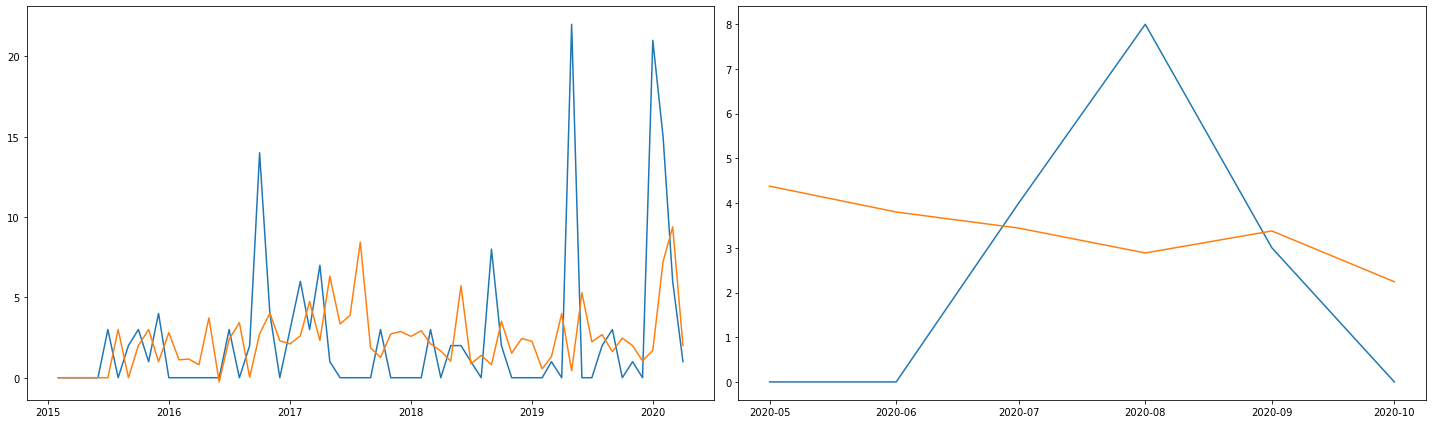

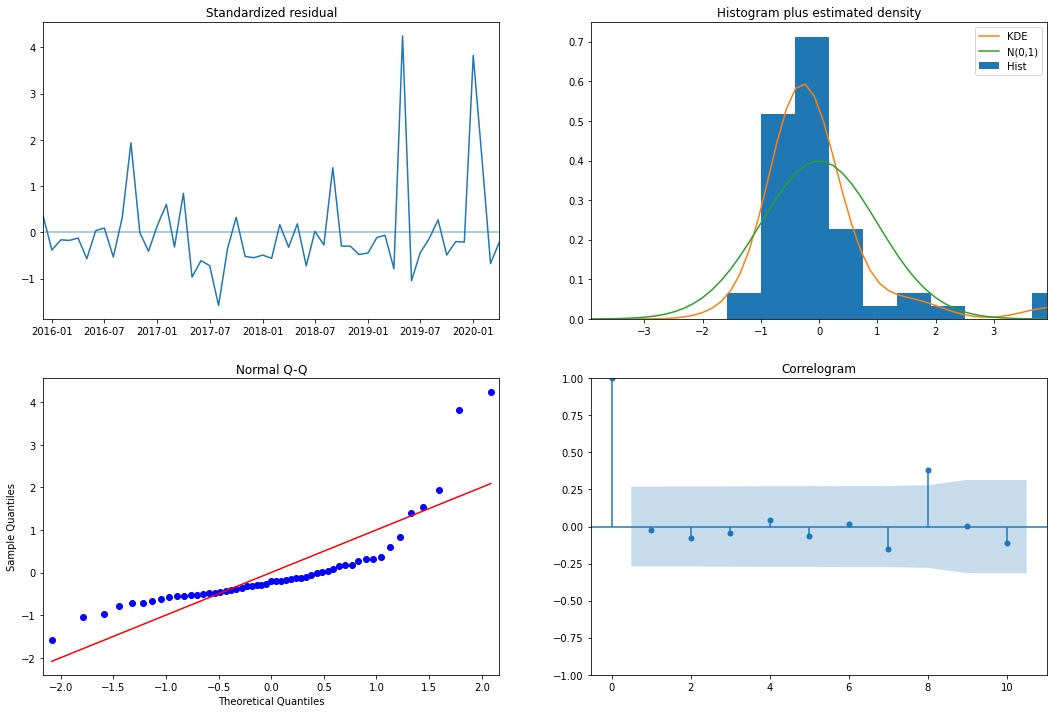

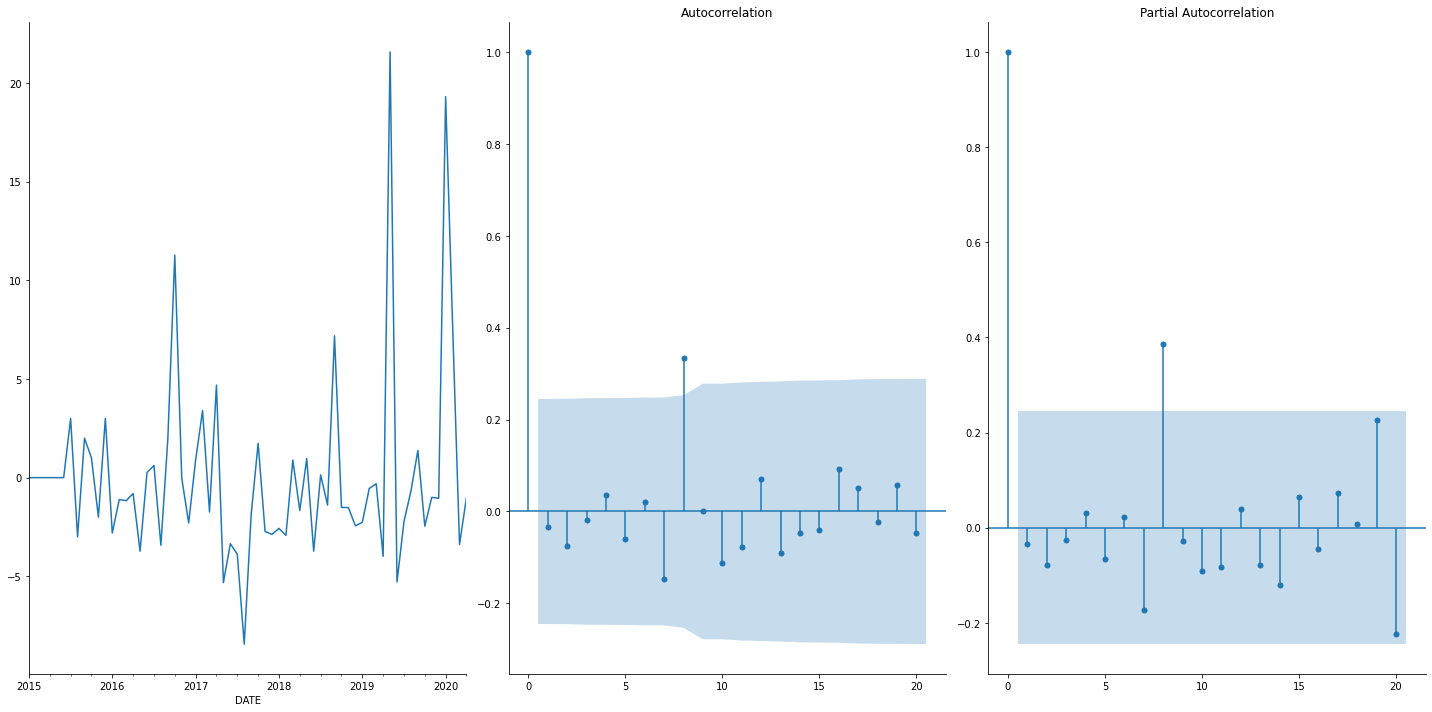

,Labor_conv_count_M
2015-01-01,0.000000
2015-02-01,0.000000
2015-03-01,0.000000
2015-04-01,0.000000
2015-05-01,0.000000
...,...
2021-01-01,7.014722
2021-02-01,2.928983
2021-03-01,3.787209
2021-04-01,3.645885


In [23]:
%run 5.SCM_SARIMA_Conversion.ipynb
Labor_conv_count_M_1 = Labor_conv_count_M_1[['data']]
Labor_conv_count_M_1.rename(columns = {'data': 'Labor_conv_count_M'}, inplace = True)
Labor_conv_count_M_1

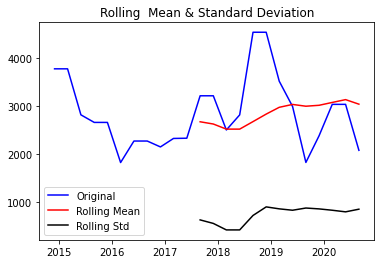

Results of Dickey-Fuller Test:
Test Statistic                 -3.146793
p-value                         0.023279
#Lags Used                      1.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64
Data is stationary - and we need no transformation to make it stationary


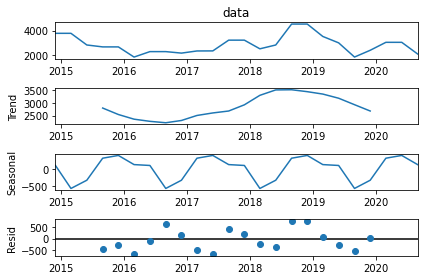

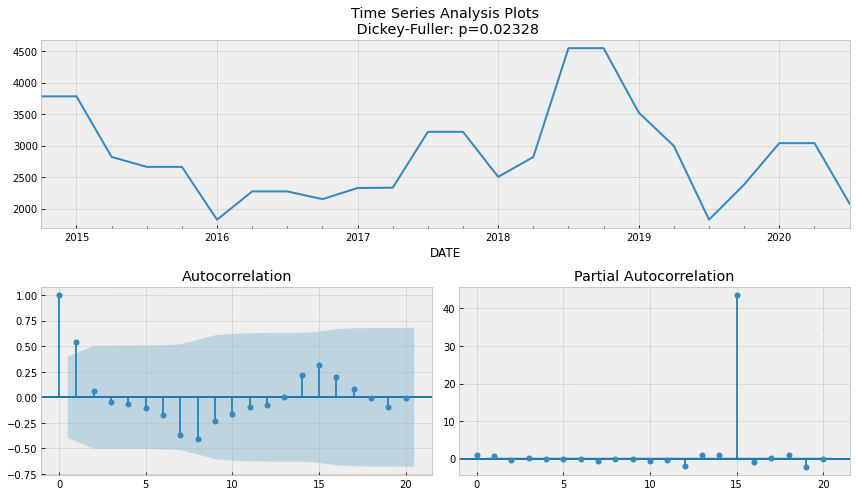

                                     SARIMAX Results                                      
Dep. Variable:                               data   No. Observations:                   21
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 6)   Log Likelihood                -156.102
Date:                            Wed, 09 Dec 2020   AIC                            322.203
Time:                                    12:33:37   BIC                            327.182
Sample:                                12-01-2014   HQIC                           323.175
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8053      0.396      2.032      0.042       0.029       1.582
ar.L2         -0.3256      0.431   

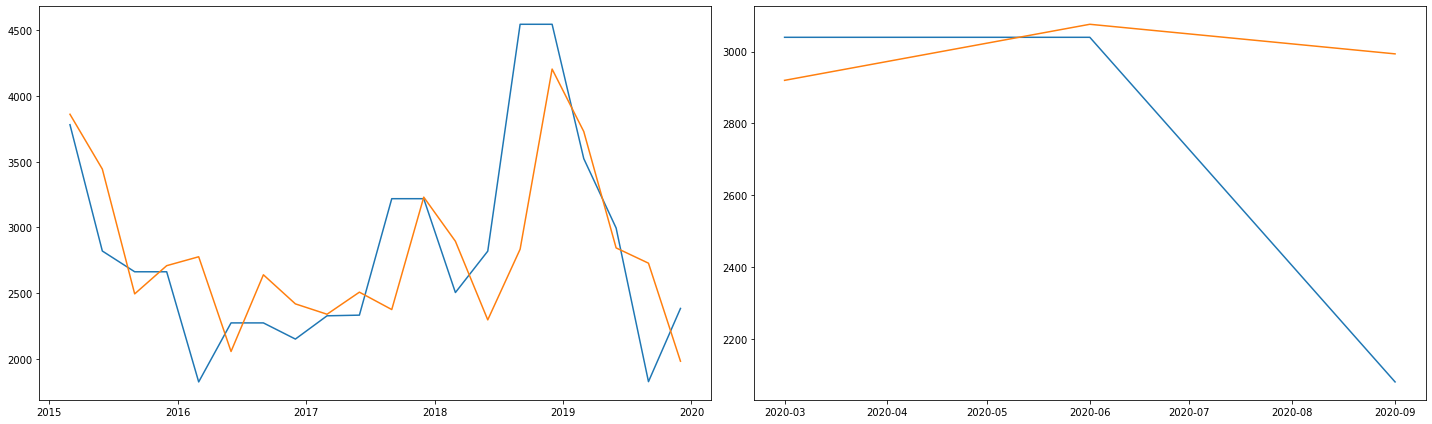

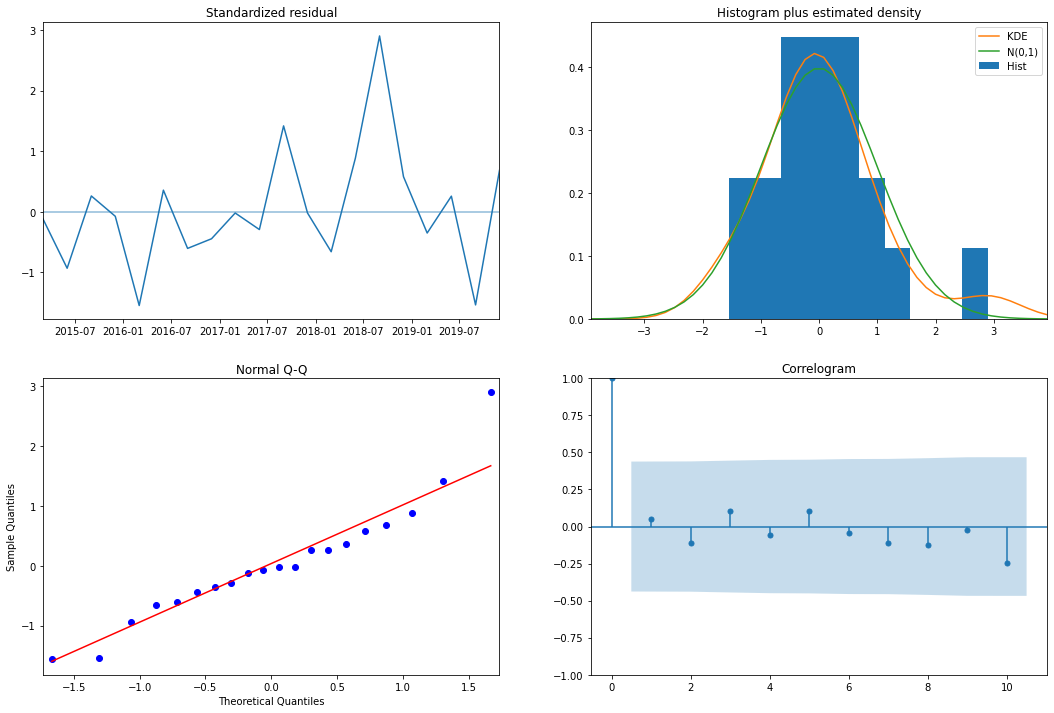

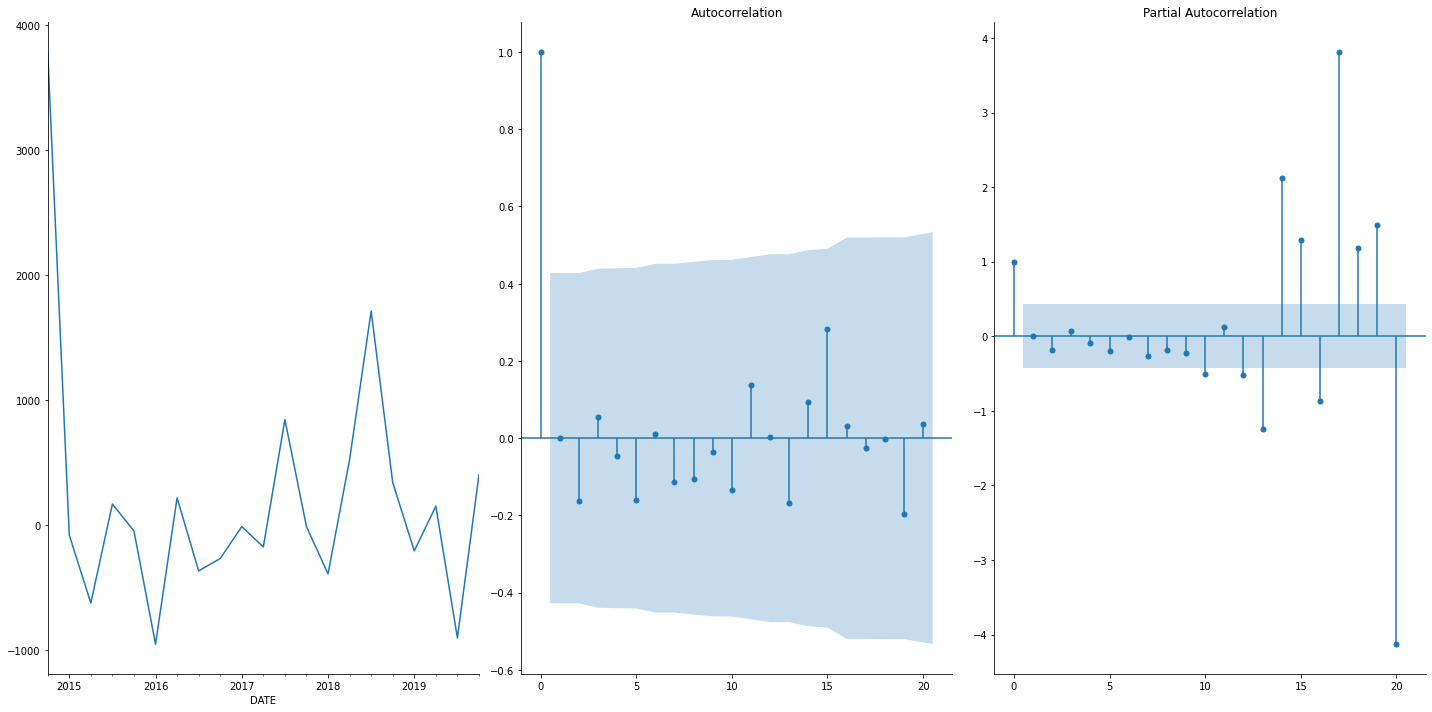

,Orders_millions_Q
2014-12-01,3782.000000
2015-03-01,3782.000000
2015-06-01,2821.000000
2015-09-01,2663.000000
2015-12-01,2663.000000
2016-03-01,1825.000000
2016-06-01,2274.000000
2016-09-01,2274.000000
2016-12-01,2151.000000
2017-03-01,2328.000000


In [24]:
%run 5.SCM_SARIMA_Orders.ipynb
Orders_millions_Q_1 = Orders_millions_Q_1[['data']]
Orders_millions_Q_1.rename(columns = {'data': 'Orders_millions_Q'}, inplace = True)
Orders_millions_Q_1


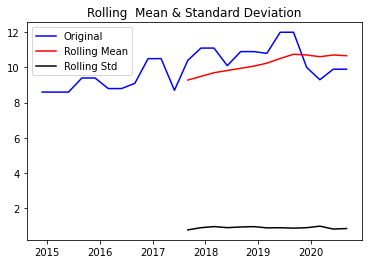

Results of Dickey-Fuller Test:
Test Statistic                 -2.362890
p-value                         0.152485
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


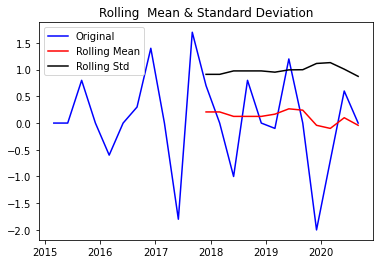

Results of Dickey-Fuller Test:
Test Statistic                 -5.554889
p-value                         0.000002
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
Data is stationary - and we need no transformation to make it stationary


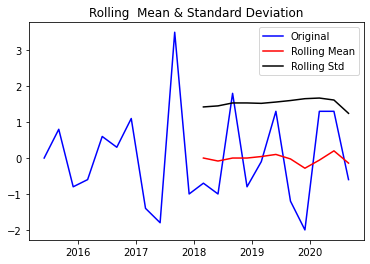

Results of Dickey-Fuller Test:
Test Statistic                 -0.598874
p-value                         0.871236
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


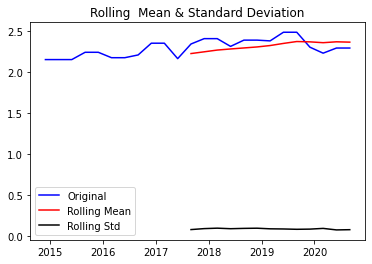

Results of Dickey-Fuller Test:
Test Statistic                 -2.381991
p-value                         0.146884
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 
                                      SARIMAX Results                                      
Dep. Variable:                                data   No. Observations:                   21
Model:             SARIMAX(0, 0, 2)x(2, 0, [], 10)   Log Likelihood                   1.912
Date:                             Wed, 09 Dec 2020   AIC                              6.176
Time:                                     12:33:46   BIC                             11.398
Sample:                                 12-01-2014   HQIC                             7.309
                           

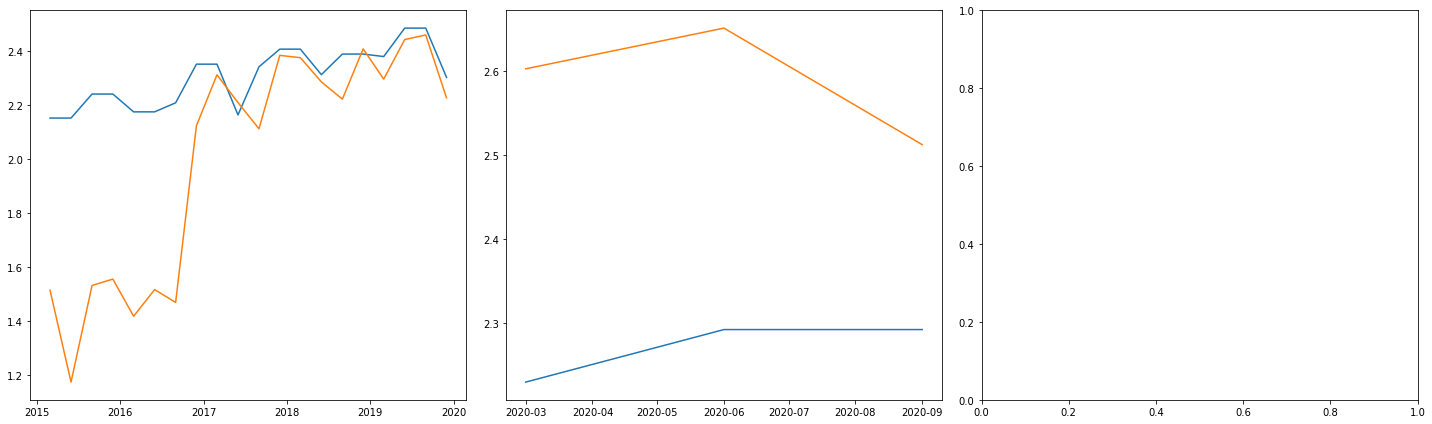

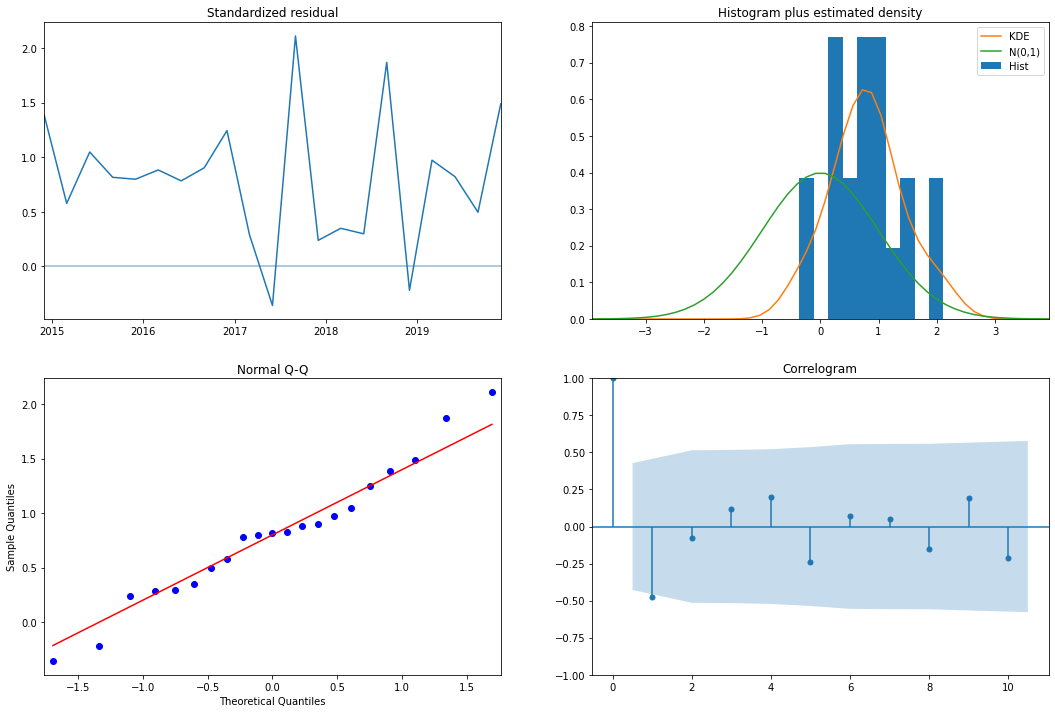

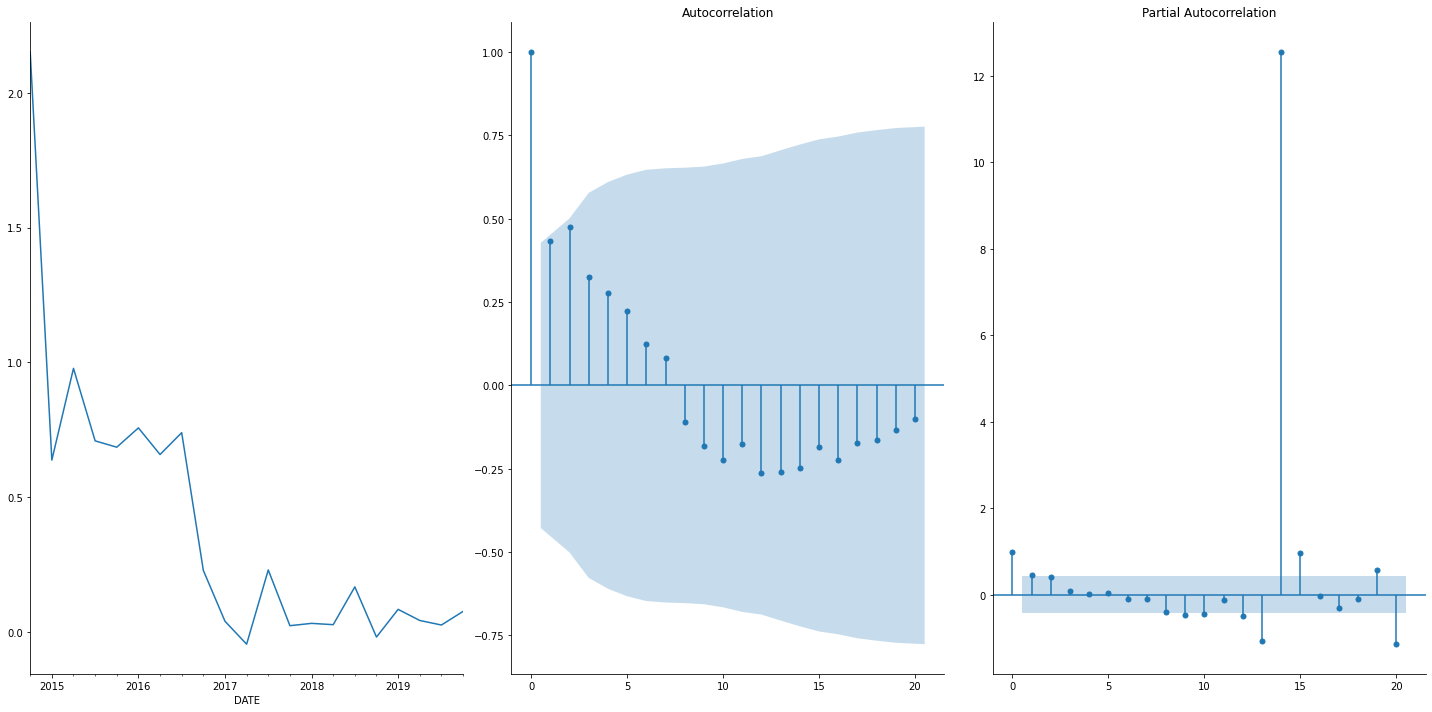

,Profit_margin_perc_Q
2014-12-01,2.151762
2015-03-01,2.151762
2015-06-01,2.151762
2015-09-01,2.240710
2015-12-01,2.240710
2016-03-01,2.174752
2016-06-01,2.174752
2016-09-01,2.208274
2016-12-01,2.351375
2017-03-01,2.351375


In [25]:
%run 5.SCM_SARIMA_Profit_margin_perc_Q.ipynb
Profit_margin_perc_Q_1 = Profit_margin_perc_Q_1[['data']]
Profit_margin_perc_Q_1.rename(columns = {'data': 'Profit_margin_perc_Q'}, inplace = True)
Profit_margin_perc_Q_1

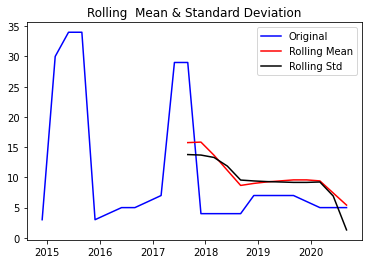

Results of Dickey-Fuller Test:
Test Statistic                 -0.835650
p-value                         0.808425
#Lags Used                      6.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


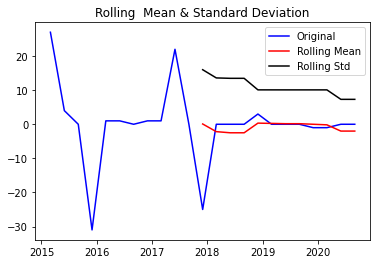

Results of Dickey-Fuller Test:
Test Statistic                 -1.749735
p-value                         0.405687
#Lags Used                      8.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64
 Data is not stationary and we will need to transform the series to make it stationary 


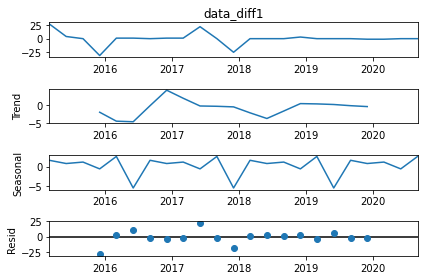

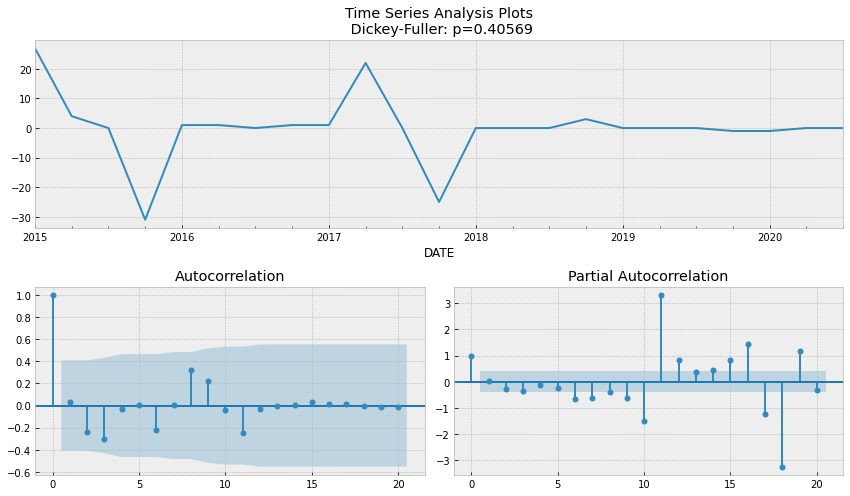

                                         SARIMAX Results                                         
Dep. Variable:                                      data   No. Observations:                   21
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3], 7)   Log Likelihood                 -77.805
Date:                                   Wed, 09 Dec 2020   AIC                            169.609
Time:                                           12:33:52   BIC                            176.579
Sample:                                       12-01-2014   HQIC                           170.970
                                            - 12-01-2019                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3510      4.419     -0.079      0.937    

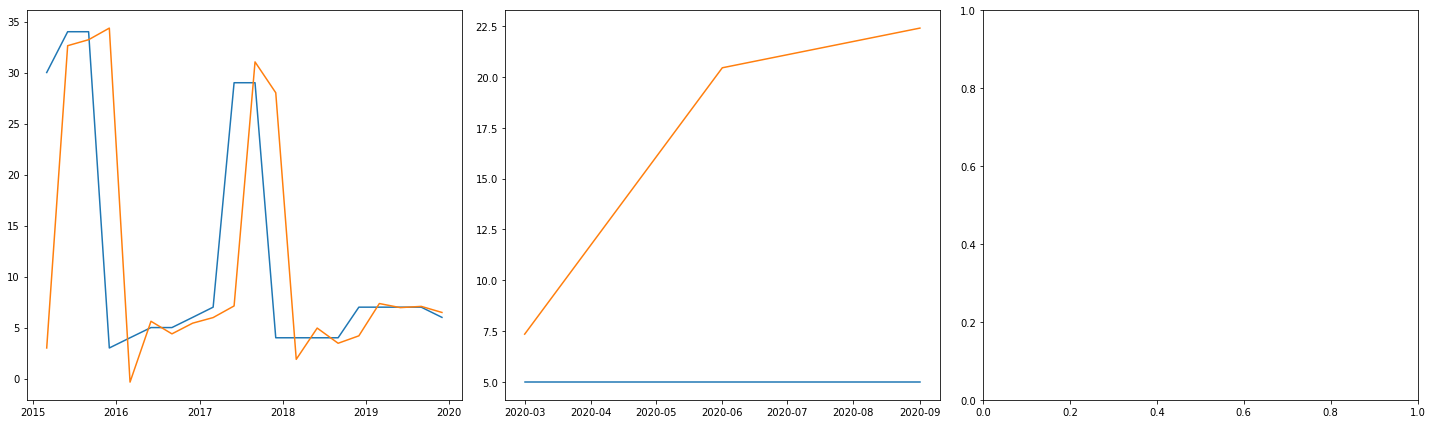

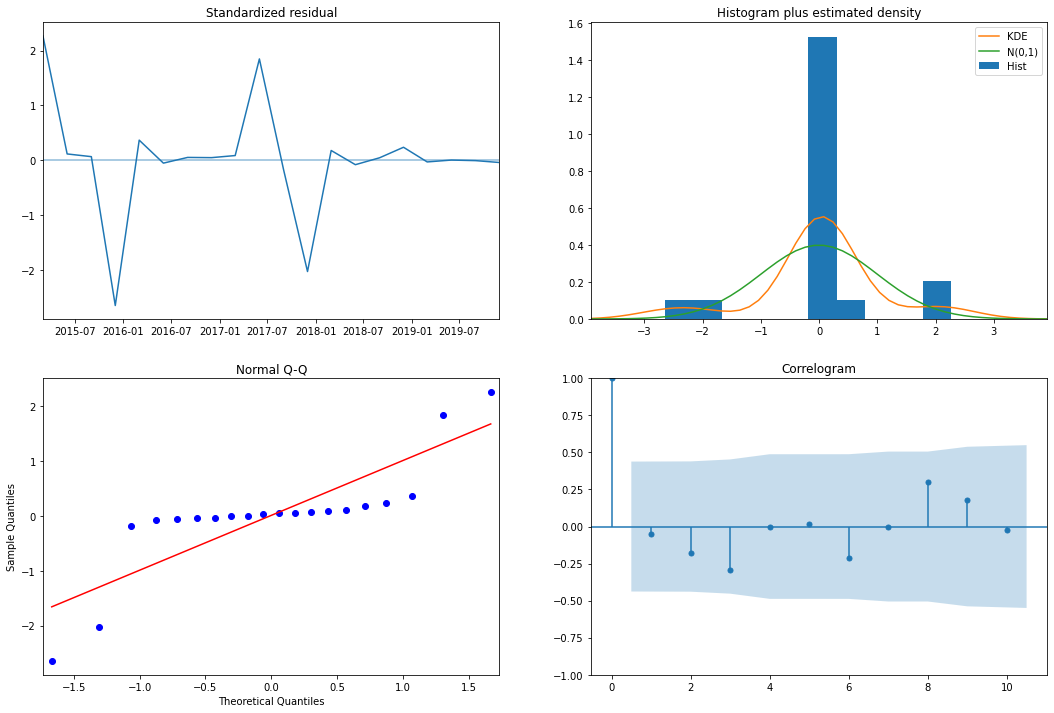

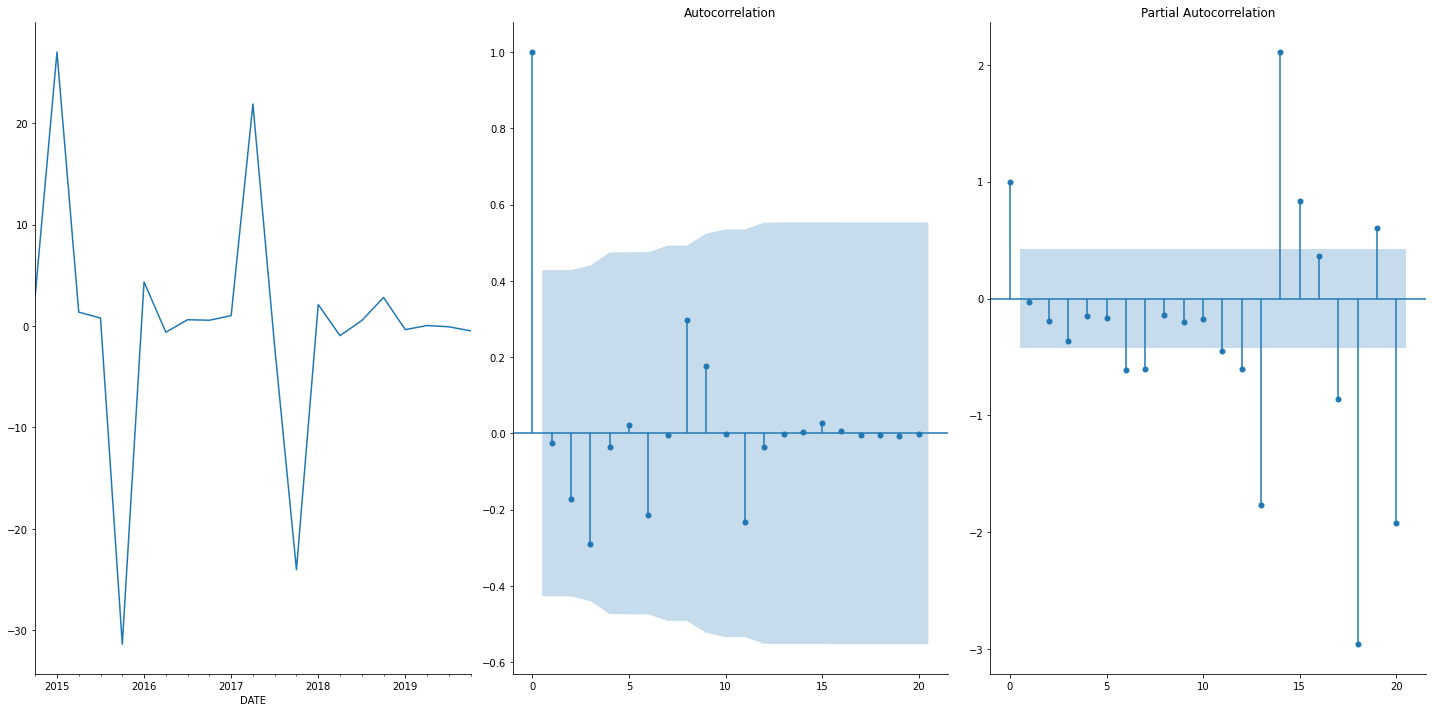

,Severance_Amount_millions_Q
2014-12-01,3.000000
2015-03-01,30.000000
2015-06-01,34.000000
2015-09-01,34.000000
2015-12-01,3.000000
2016-03-01,4.000000
2016-06-01,5.000000
2016-09-01,5.000000
2016-12-01,6.000000
2017-03-01,7.000000


In [26]:
%run 5.SCM_SARIMA_Severance.ipynb
Severance_Amount_millions_Q_1 = Severance_Amount_millions_Q_1[['data']]
Severance_Amount_millions_Q_1.rename(columns = {'data': 'Severance_Amount_millions_Q'}, inplace = True)
Severance_Amount_millions_Q_1

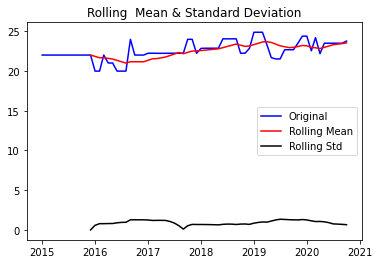

Results of Dickey-Fuller Test:
Test Statistic                 -3.689544
p-value                         0.004263
#Lags Used                      0.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64
Data is stationary - and we need no transformation to make it stationary


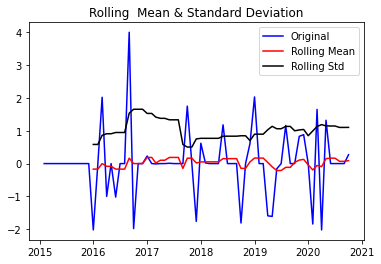

Results of Dickey-Fuller Test:
Test Statistic                -6.048837e+00
p-value                        1.292182e-07
#Lags Used                     4.000000e+00
Number of Observations Used    6.400000e+01
Critical Value (1%)           -3.536928e+00
Critical Value (5%)           -2.907887e+00
Critical Value (10%)          -2.591493e+00
dtype: float64
Data is stationary - and we need no transformation to make it stationary


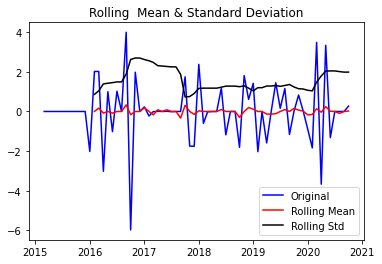

Results of Dickey-Fuller Test:
Test Statistic                 -5.191872
p-value                         0.000009
#Lags Used                      9.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64
Data is stationary - and we need no transformation to make it stationary


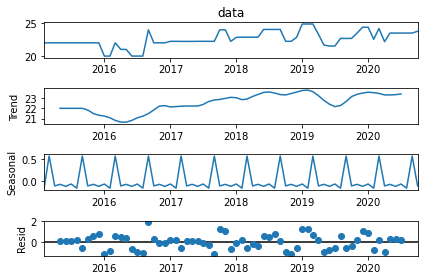

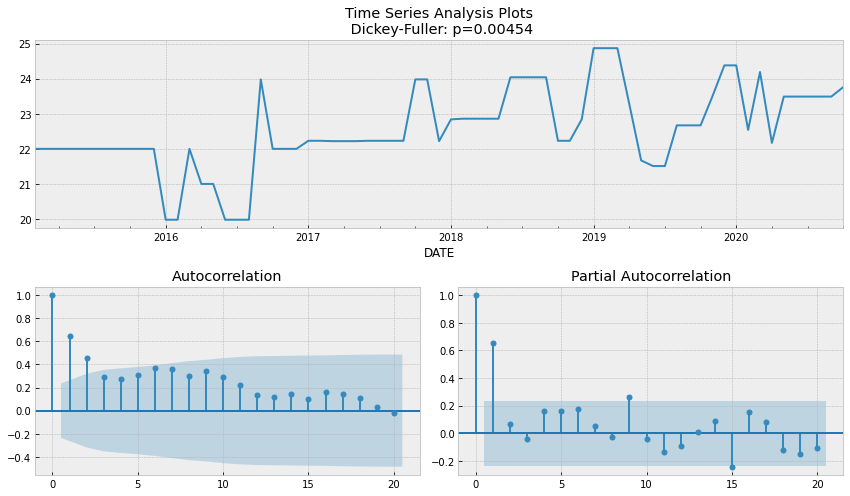

                                      SARIMAX Results                                       
Dep. Variable:                                 data   No. Observations:                   64
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 17)   Log Likelihood                -158.202
Date:                              Wed, 09 Dec 2020   AIC                            326.404
Time:                                      12:34:00   BIC                            337.198
Sample:                                  01-01-2015   HQIC                           330.656
                                       - 04-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.6032      0.585      2.739      0.006       0.456       2.750
ma.L2          0.99

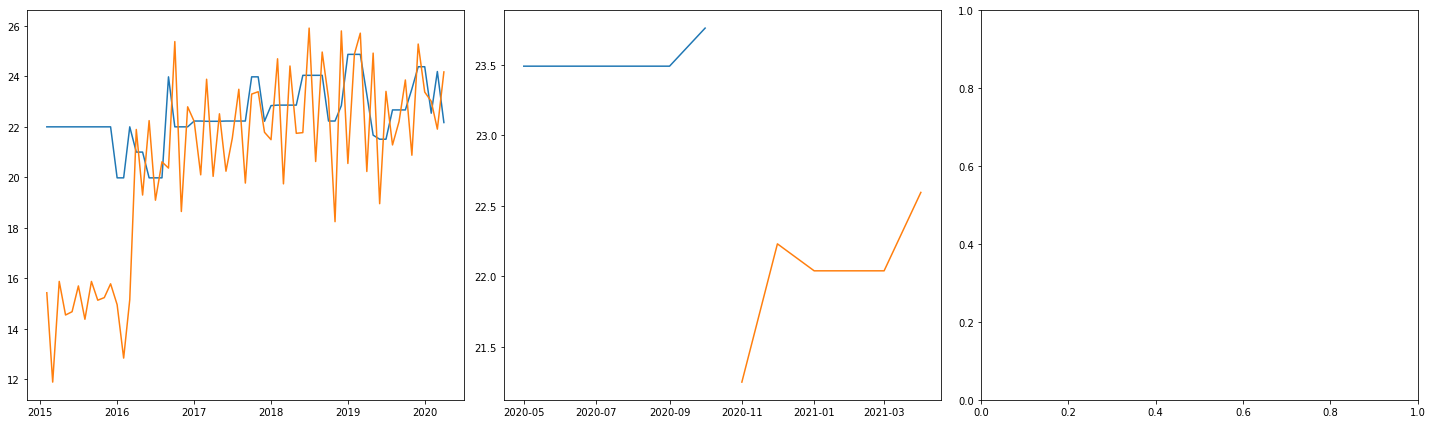

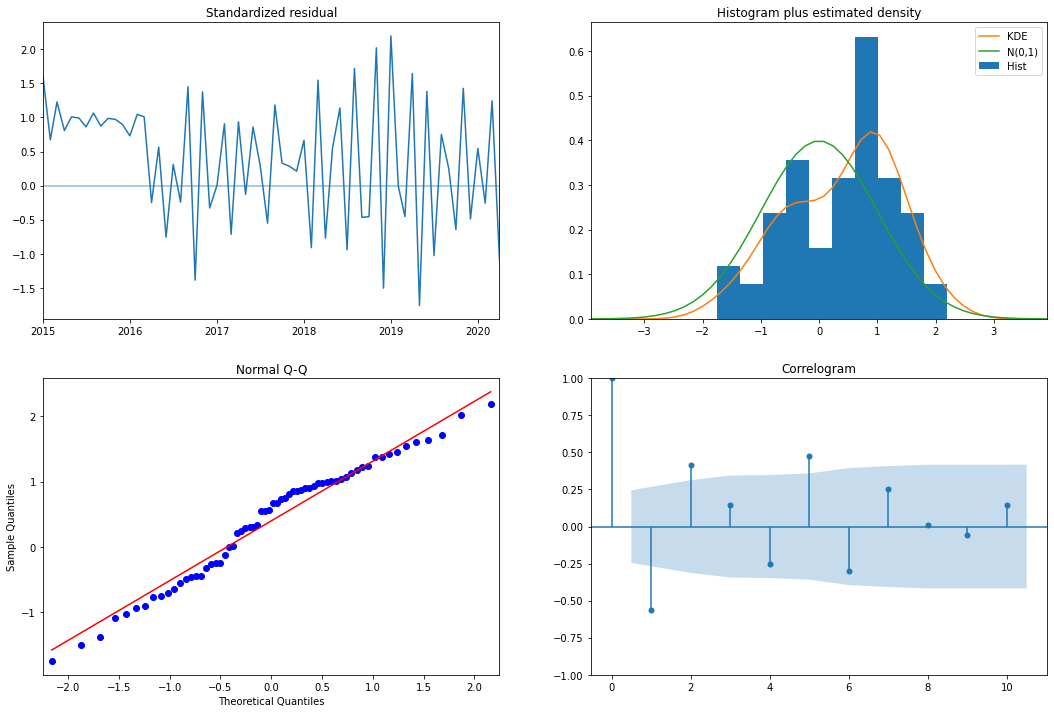

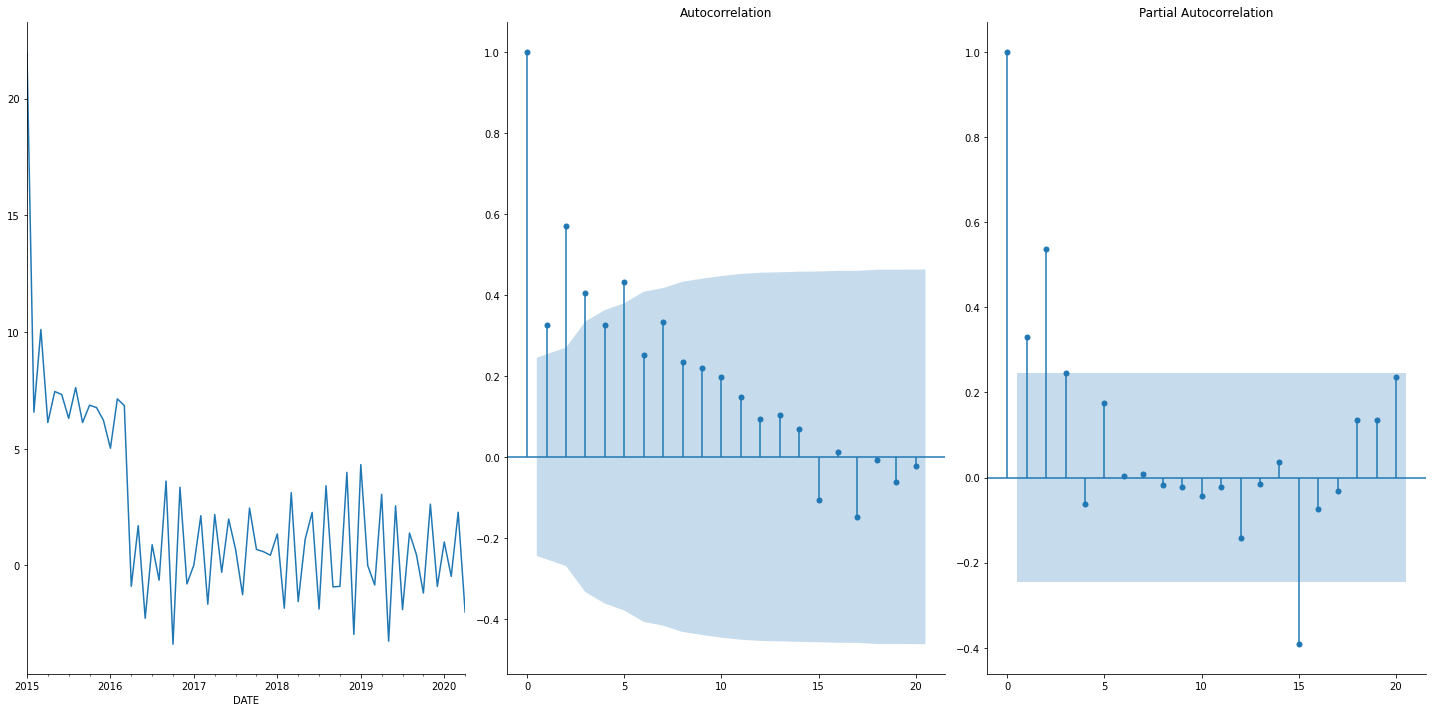

,wage_max
2015-01-01,22.000000
2015-02-01,22.000000
2015-03-01,22.000000
2015-04-01,22.000000
2015-05-01,22.000000
...,...
2021-01-01,22.346744
2021-02-01,22.346744
2021-03-01,22.346744
2021-04-01,22.922330


In [27]:
%run 5.SCM_SARIMA_wage_max.ipynb
wage_max_1 = wage_max_1[['data']]
wage_max_1.rename(columns = {'data': 'wage_max'}, inplace = True)
wage_max_1

In [28]:
data_frames = [input_df[['Labor Demand']],
               awh_prd_emp_mfg_dur_gds_cal_M_Fred_1,
               All_emp_mfg_dur_gds_SA_MSA_M_Fred_1,
               Civ_lab_force_SA_county_m_Fred_1,
               Labor_conv_count_M_1,
               Orders_millions_Q_1,
               Profit_margin_perc_Q_1,
               Severance_Amount_millions_Q_1,
               wage_max_1
              ]
output_df = reduce(lambda left,right: pd.merge(left,right,  left_index = True, right_index = True,
                                            how='outer'), data_frames)

In [29]:
output_df.tail(2)

,Labor Demand,awh_prd_emp_mfg_dur_gds_cal_M_Fred,All_emp_mfg_dur_gds_SA_MSA_M_Fred,Civ_lab_force_SA_county_m_Fred,Labor_conv_count_M,Orders_millions_Q,Profit_margin_perc_Q,Severance_Amount_millions_Q,wage_max
2021-04-01,NaN,NaN,NaN,NaN,3.645885,NaN,NaN,NaN,22.922330
2021-05-01,NaN,NaN,NaN,NaN,4.334515,NaN,NaN,NaN,23.158439


In [30]:
output_df = output_df.fillna(method='bfill')
output_df['date'] = output_df.index
output_df.tail(20)

,Labor Demand,awh_prd_emp_mfg_dur_gds_cal_M_Fred,All_emp_mfg_dur_gds_SA_MSA_M_Fred,Civ_lab_force_SA_county_m_Fred,Labor_conv_count_M,Orders_millions_Q,Profit_margin_perc_Q,Severance_Amount_millions_Q,wage_max,date
2019-10-01,120.0,25.797253,24.000000,715047.000000,0.000000,2384.000000,2.302585,6.000000,22.670000,2019-10-01
2019-11-01,115.0,25.465242,24.300000,715263.000000,1.000000,2384.000000,2.302585,6.000000,23.500000,2019-11-01
2019-12-01,110.0,25.702553,24.300000,714835.000000,0.000000,2384.000000,2.302585,6.000000,24.380000,2019-12-01
2020-01-01,112.0,25.453035,24.400000,714155.000000,21.000000,3040.000000,2.230014,5.000000,24.380000,2020-01-01
2020-02-01,94.0,25.709882,24.300000,714834.000000,15.000000,3040.000000,2.230014,5.000000,22.540000,2020-02-01
2020-03-01,96.0,25.547427,24.000000,711060.000000,6.000000,3040.000000,2.230014,5.000000,24.190000,2020-03-01
2020-04-01,82.0,25.661888,21.600000,689861.000000,1.000000,3040.000000,2.292535,5.000000,22.170000,2020-04-01
2020-05-01,94.0,25.855238,21.600000,695119.000000,0.000000,3040.000000,2.292535,5.000000,23.490000,2020-05-01
2020-06-01,96.0,25.595351,21.500000,709583.000000,0.000000,3040.000000,2.292535,5.000000,23.490000,2020-06-01
2020-07-01,91.0,25.378577,21.300000,708988.000000,4.000000,2080.000000,2.292535,5.000000,23.490000,2020-07-01


In [31]:
output_df.to_csv('master_data_with_approximations.csv') # Use Tab to seperate data